### Name :- Rutik Desai
##### GRIP FEB2021 @TheSparkFoundation
##### Task 1 : Predict the percentage of an student based on the no. of study hours.



### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
### Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
### Reading Data
df=pd.read_csv("student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE986B2DF0>,
      dtype=object)

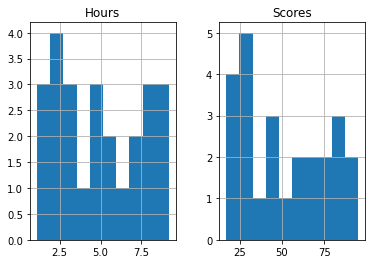

In [7]:
df.hist()

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

Text(0, 0.5, 'Percentage Score')

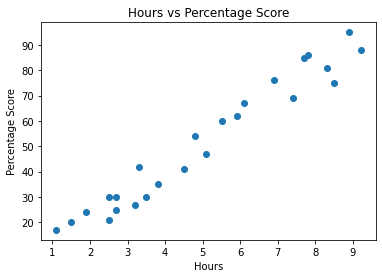

In [8]:
plt.scatter(x=df['Hours'],y=df['Scores'])
plt.title("Hours vs Percentage Score")
plt.xlabel("Hours")
plt.ylabel("Percentage Score")

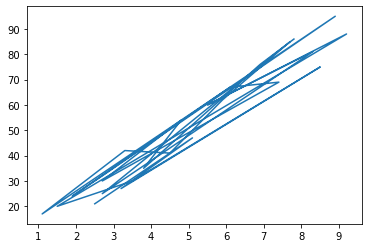

In [9]:
plt.plot(df['Hours'],df['Scores'])

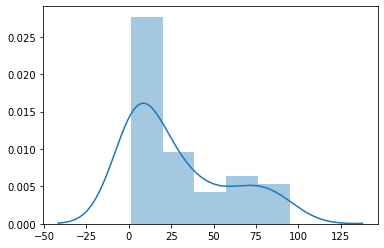

In [10]:
sn.distplot(df)

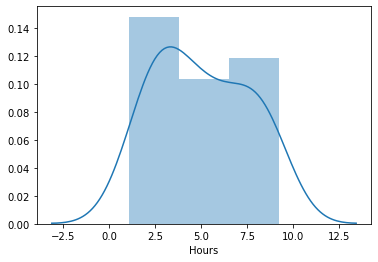

In [11]:
sn.distplot(df['Hours'])

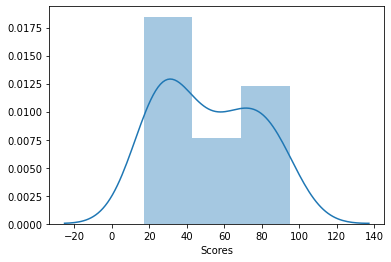

In [12]:
sn.distplot(df['Scores'])

In [13]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


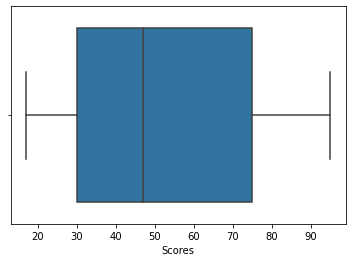

In [15]:
sn.boxplot(data=df,x=df['Scores'])

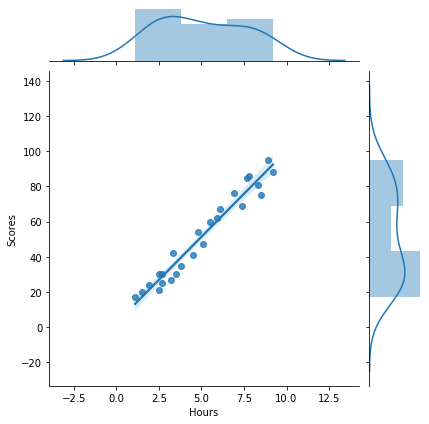

In [16]:
sn.jointplot(df['Hours'], df['Scores'], kind = "reg")
plt.show()

In [17]:
 df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [18]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [19]:

x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [20]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [24]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [25]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [26]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [27]:
X_train.shape

(20, 1)

In [28]:
y_train.shape

(20,)

In [30]:
X_test.shape

(5, 1)

In [31]:
y_test.shape

(5,)

In [32]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
model.score(X_train,y_train)

0.9515510725211552

In [36]:
y_pred=model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [38]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [39]:
model.intercept_

2.018160041434683

In [40]:
model.coef_

array([9.91065648])

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [41]:
model.predict([[9.25]])

array([93.69173249])

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [44]:
print("Mean Absolute Error :- ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error :- ",mean_squared_error(y_test,y_pred))
print("r2 score :- ",r2_score(y_test,y_pred))

Mean Absolute Error :-  4.183859899002975
Mean Squared Error :-  21.5987693072174
r2 score :-  0.9454906892105356
